In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

<h3>EDA</h3>
Viewing the Data

In [3]:
insurance=pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Finding Missing Values

In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visulization of Data

In [9]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Continous Column

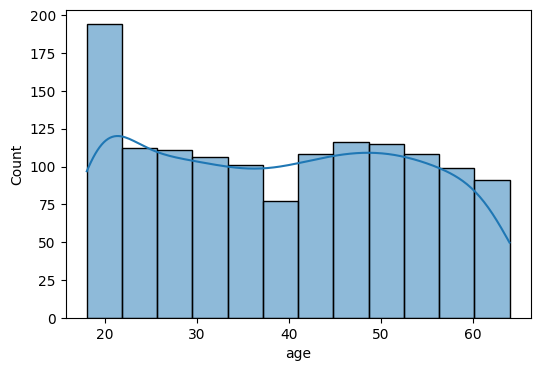

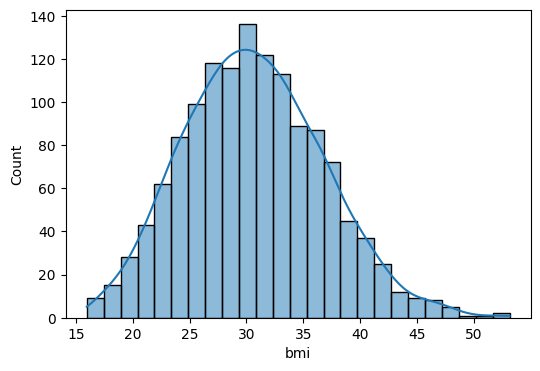

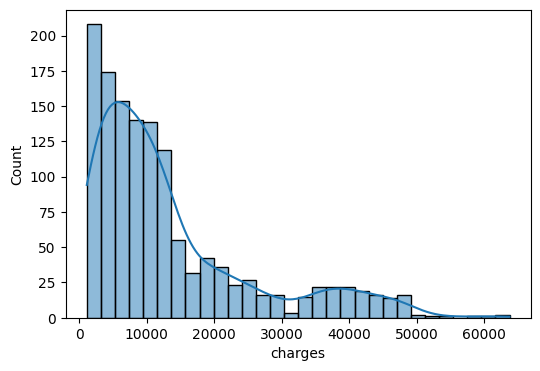

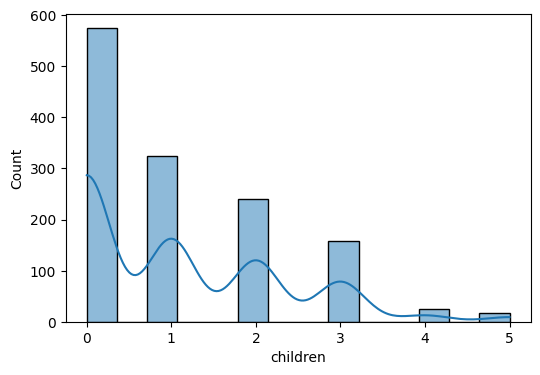

In [10]:
col=["age","bmi","charges","children"]
for col in col:
        plt.figure(figsize=(6,4))
        sb.histplot(x=insurance[col],kde=True)

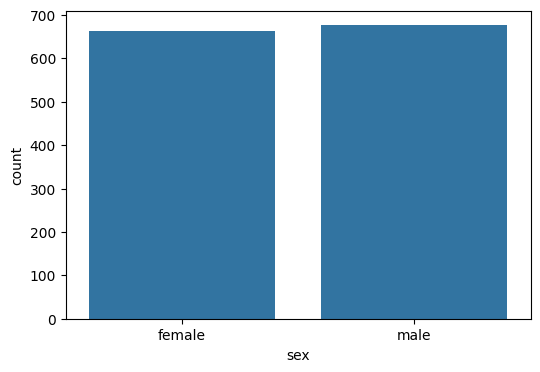

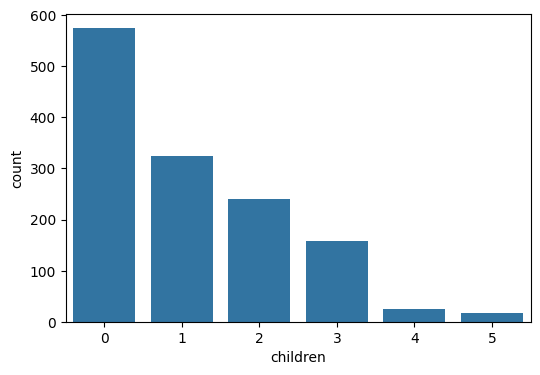

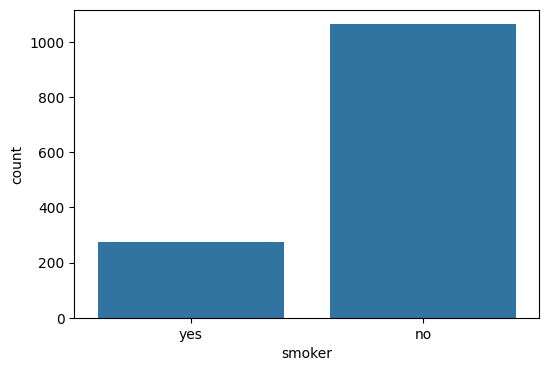

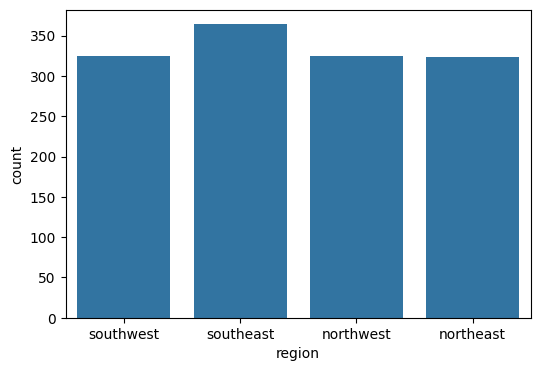

In [11]:
categorical_col=['sex', 'children', 'smoker', 'region']
for col in categorical_col:
        plt.figure(figsize=[6,4])
        sb.countplot(x=insurance[col])

In [12]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

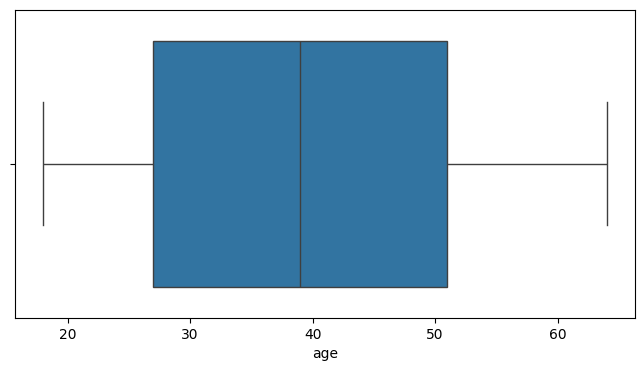

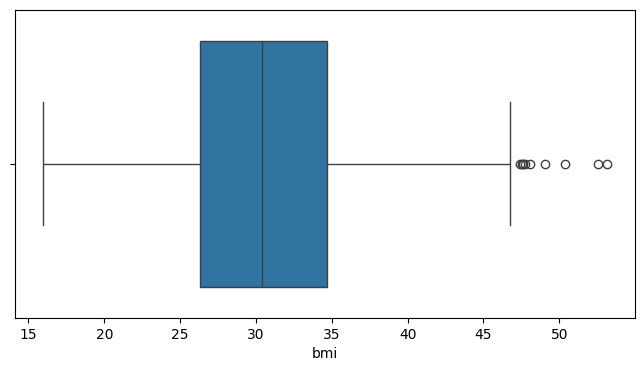

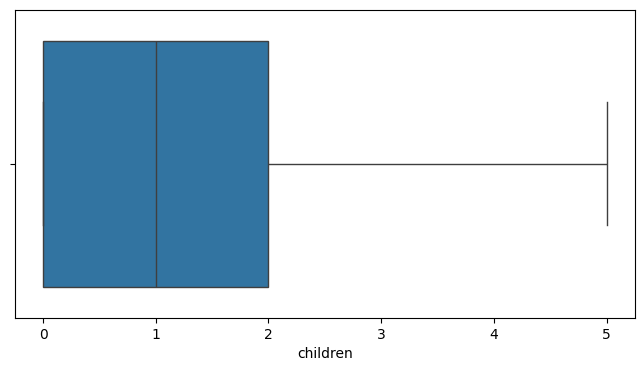

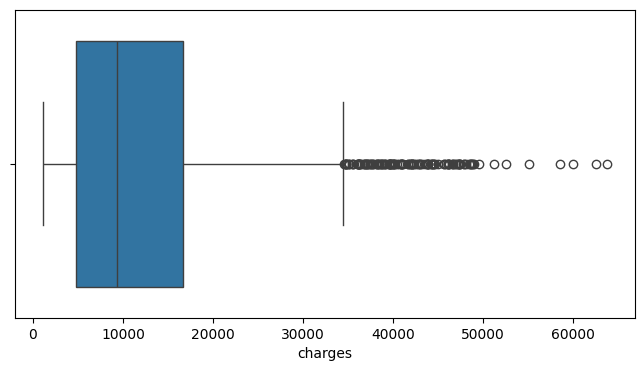

In [13]:
for col in ['age', 'bmi', 'children', 'charges']:
        plt.figure(figsize=[8,4])
        sb.boxplot(x=insurance[col])

<Axes: >

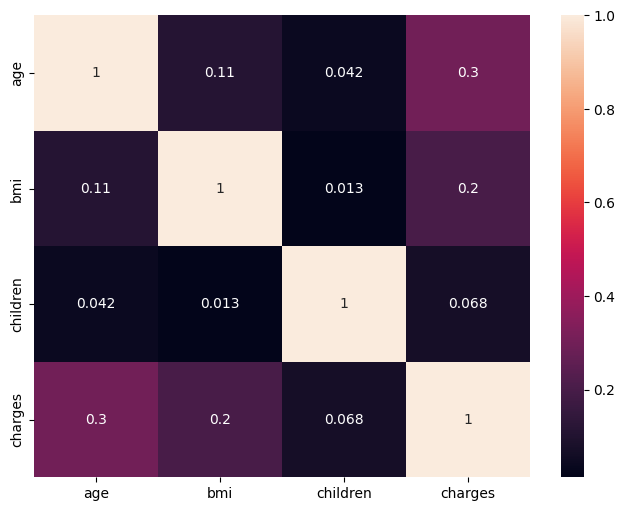

In [14]:
plt.figure(figsize=[8,6])
sb.heatmap(insurance.corr(numeric_only=True),annot=True)

# Data Cleaning

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance_cleaned=insurance.copy()
insurance_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
insurance_cleaned.drop_duplicates(inplace=True)

In [18]:
insurance_cleaned.shape

(1337, 7)

In [19]:
insurance_cleaned.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
insurance_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Now we have encode our gender, smoker and region column into int because we cannot train our model on string values so everything should be in numeric

In [21]:
insurance_cleaned["sex"]=insurance_cleaned["sex"].map({"male":0,"female":1})
insurance_cleaned.rename(columns={"sex":"isFemale"},inplace=True)
insurance_cleaned.head()

,age,isFemale,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [22]:
insurance_cleaned.dtypes

age           int64
isFemale      int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
insurance_cleaned["smoker"]=insurance_cleaned["smoker"].map({"yes":1,"no":0})
insurance_cleaned.rename(columns={"smoker":"isSmoker"},inplace=True)
insurance_cleaned.head()

,age,isFemale,bmi,children,isSmoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [24]:
insurance_cleaned.dtypes

age           int64
isFemale      int64
bmi         float64
children      int64
isSmoker      int64
region       object
charges     float64
dtype: object

One-Hot Encoding for Nominal data like region

In [25]:
insurance_cleaned=pd.get_dummies(insurance_cleaned,columns=["region"],drop_first=True)
insurance_cleaned.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [26]:
insurance_cleaned=insurance_cleaned.astype(int)
insurance_cleaned.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feature Engineering

Extracting a new feature from BMI coloumn and making bmi category

In [27]:
bins = [0, 18.5, 25.0, 30.0, 35.0, 40.0, np.inf]
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity Class 1", "Obesity Class 2", "Severe Obesity"]
insurance_cleaned["bmi_category"]=pd.cut(insurance_cleaned["bmi"],bins=bins,labels=labels)
insurance_cleaned.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,Overweight
1,18,0,33,1,0,1725,0,1,0,Obesity Class 1
2,28,0,33,3,0,4449,0,1,0,Obesity Class 1
3,33,0,22,0,0,21984,1,0,0,Healthy Weight
4,32,0,28,0,0,3866,1,0,0,Overweight


In [28]:
insurance_cleaned.dtypes

age                    int64
isFemale               int64
bmi                    int64
children               int64
isSmoker               int64
charges                int64
region_northwest       int64
region_southeast       int64
region_southwest       int64
bmi_category        category
dtype: object

Now we have to again convert the bmi_category into number using one hot encoding

In [29]:
insurance_cleaned=pd.get_dummies(insurance_cleaned,columns=["bmi_category"],drop_first=True)
insurance_cleaned=insurance_cleaned.astype(int)
insurance_cleaned.head()

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Healthy Weight,bmi_category_Overweight,bmi_category_Obesity Class 1,bmi_category_Obesity Class 2,bmi_category_Severe Obesity
0,19,1,27,0,1,16884,0,0,1,0,1,0,0,0
1,18,0,33,1,0,1725,0,1,0,0,0,1,0,0
2,28,0,33,3,0,4449,0,1,0,0,0,1,0,0
3,33,0,22,0,0,21984,1,0,0,1,0,0,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0,0,0


# Feature Scaling

now we have to scale the feature like age bmi and children between -3 and +3

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=["age","bmi","children"]
insurance_cleaned[cols]=scaler.fit_transform(insurance_cleaned[cols])
insurance_cleaned.head()


,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Healthy Weight,bmi_category_Overweight,bmi_category_Obesity Class 1,bmi_category_Obesity Class 2,bmi_category_Severe Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0,0


In [31]:
insurance_cleaned.columns

Index(['age', 'isFemale', 'bmi', 'children', 'isSmoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Healthy Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity Class 1', 'bmi_category_Obesity Class 2',
       'bmi_category_Severe Obesity'],
      dtype='object')

In [33]:
from scipy.stats import pearsonr
selected_feature=['age', 'isFemale', 'bmi', 'children', 'isSmoker', 
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Healthy Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity Class 1', 'bmi_category_Obesity Class 2',
       'bmi_category_Severe Obesity']


In [ ]:
correlations_with_charges={
        feature: pearsonr(insurance_cleaned[feature],insurance_cleaned["charges"])[0]
        for feature in selected_feature
}

{'age': np.float64(0.29830870258771736),
 'isFemale': np.float64(-0.05804580933726394),
 'bmi': np.float64(0.1962362929936443),
 'children': np.float64(0.06739024185912061),
 'isSmoker': np.float64(0.7872337542693594),
 'region_northwest': np.float64(-0.03869515161276133),
 'region_southeast': np.float64(0.07357719339126033),
 'region_southwest': np.float64(-0.04363698192991321),
 'bmi_category_Healthy Weight': np.float64(-0.12158647014239954),
 'bmi_category_Overweight': np.float64(-0.08155507517171823),
 'bmi_category_Obesity Class 1': np.float64(0.08285913982281234),
 'bmi_category_Obesity Class 2': np.float64(0.11887242878907235),
 'bmi_category_Severe Obesity': np.float64(0.07378299259724688)}

In [38]:
correlation=pd.DataFrame(list(correlations_with_charges.items()),columns=["Feature","Pearsonr Correlation"])
correlation=correlation.sort_values(by="Pearsonr Correlation",ascending=False)
correlation

,Feature,Pearsonr Correlation
4,isSmoker,0.787234
0,age,0.298309
2,bmi,0.196236
11,bmi_category_Obesity Class 2,0.118872
10,bmi_category_Obesity Class 1,0.082859
12,bmi_category_Severe Obesity,0.073783
6,region_southeast,0.073577
3,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637


Now we will finally perform the chai square test to identify what features we have to keep or what to drop by checking the p value if it less than alpha we will keep the feature and drop if it is greater than alpha

In [39]:
from scipy.stats import chi2_contingency as chaiSqure

Making the bins and giving tags :
0 = Low charges
1 = Medium Low charges
2 =Medium High charges
3= High charges

In [40]:
alpha=0.05
insurance_cleaned['charges_bin'] = pd.qcut(insurance_cleaned['charges'], q=4, labels=False)
insurance_cleaned

,age,isFemale,bmi,children,isSmoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Healthy Weight,bmi_category_Overweight,bmi_category_Obesity Class 1,bmi_category_Obesity Class 2,bmi_category_Severe Obesity,charges_bin
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,0,0,3
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1,0,0,0
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1,0,0,0
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,0,0,3
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,1,0,0,0,2
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1,0,0,0
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,0,1,0,0
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,1,0,0,0,0,0


In [55]:
insurance_cleaned.columns

Index(['age', 'isFemale', 'bmi', 'children', 'isSmoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Healthy Weight', 'bmi_category_Overweight',
       'bmi_category_Obesity Class 1', 'bmi_category_Obesity Class 2',
       'bmi_category_Severe Obesity', 'charges_bin'],
      dtype='object')

In [59]:
categoricalColumn=["isFemale","isSmoker","region_northwest","region_southeast","region_southwest","bmi_category_Healthy Weight","bmi_category_Overweight","bmi_category_Obesity Class 1","bmi_category_Obesity Class 2","bmi_category_Severe Obesity"]
chaiObj={}
for column in categoricalColumn:
        frequency_frame=pd.crosstab(insurance_cleaned[column],insurance_cleaned["charges_bin"]) # it makes the frquency table telling how many for example male or female are fall in which bins and they are counted
        chai_value,pvalue,_,_=chaiSqure(frequency_frame)
        decision= f"Keep {column} Feature" if pvalue < alpha else f"Drop {column} Feature"
        chaiObj[column]={
                "Chai value: ":chai_value,
                "P Value":pvalue,
                "Decision":decision
        }
final_dataset_for_model_training=pd.DataFrame(chaiObj).T
final_dataset_for_model_training.sort_values(by="P Value",inplace=True)
final_dataset_for_model_training

,Chai value:,P Value,Decision
isSmoker,848.219178,0.0,Keep isSmoker Feature
region_southeast,15.998167,0.001135,Keep region_southeast Feature
isFemale,10.258784,0.01649,Keep isFemale Feature
bmi_category_Obesity Class 2,7.773364,0.050935,Drop bmi_category_Obesity Class 2 Feature
region_southwest,5.091893,0.165191,Drop region_southwest Feature
bmi_category_Healthy Weight,4.771699,0.189298,Drop bmi_category_Healthy Weight Feature
bmi_category_Overweight,4.450807,0.21672,Drop bmi_category_Overweight Feature
bmi_category_Obesity Class 1,1.238129,0.743875,Drop bmi_category_Obesity Class 1 Feature
region_northwest,1.13424,0.768815,Drop region_northwest Feature
bmi_category_Severe Obesity,1.133734,0.768937,Drop bmi_category_Severe Obesity Feature
